<a href="https://colab.research.google.com/github/kapibara3chi/Make_Design_Structure_Matrix/blob/main/DSM_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python

In [ ]:
!pip install streamlit
# !pip install pyngrok

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from pyngrok import ngrok

# public_url = ngrok.connect(port='80')
# print(public_url)
# print("****")

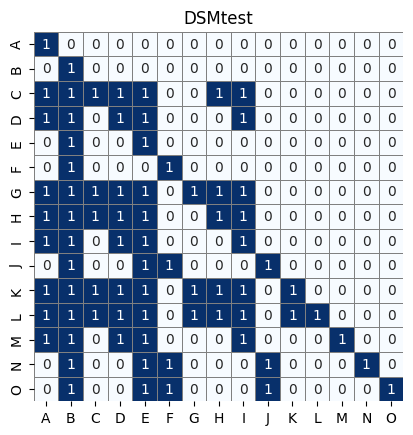

Sequenced DSM:



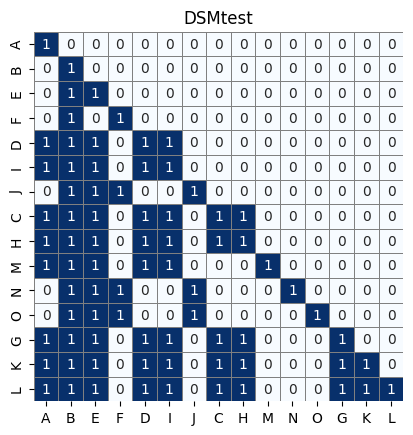

In [ ]:

# ***work***
# %%writefile /content/drive/MyDrive/DSM/my_module.py
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def make_dsm_by_sns(B,values):

  # # データの作成
 # print(df)

  # Seabornを使ったヒートマップの作成
  # sns.heatmap(df, annot=True, cmap='Blues', fmt='d', linewidths=0.5, linecolor='grey', square=True)

  sns.heatmap(B, annot=True, cbar=False, square=True, cmap="Blues", linewidths=0.5, linecolor="grey",
            xticklabels=values, yticklabels=values)

  plt.title('DSMtest')
  plt.savefig("DSMtest.png",bbox_inches="tight")
  plt.show()

## convert DSM to ReachableMatrix

def toReachableMatrix(DSM):
    size_DSM = DSM.shape[0]
    I = np.eye(size_DSM, dtype=int) # identity matrix
    R1 = np.zeros((size_DSM, size_DSM), dtype=int)
    calcmax = 1000

    for i in range(1, calcmax+1):
        R1 = np.linalg.matrix_power((DSM + I), i)
        Rindex = np.where(R1 > 1)
        R1[Rindex] = np.ones(len(Rindex[0]), dtype=int)

        R2 = np.linalg.matrix_power((DSM + I), (i+1))
        Rindex = np.where(R2 > 1)
        R2[Rindex] = np.ones(len(Rindex[0]), dtype=int)

        if np.array_equal(R1, R2):
            break

    return R1


def OrderReachable(Reachable):
    original = np.copy(Reachable)
    DSMsize = Reachable.shape[0]
    count = 0
    valuesDSM = np.arange(1, DSMsize+1)
    # print(valuesDSM)
    count = 0
    level = np.zeros(DSMsize, dtype=int)
    # print(level)

    while count < DSMsize:
        R = Reachable.copy()
        A = Reachable.T.copy()
        # RA = R.dot(A)
        # R = Reachable
        # A = Reachable.T
        RA = np.multiply(R, A)
        (RAsize, _) = RA.shape
        elements = np.arange(1, RAsize+1)
        # print("R")
        # print(R)
        # print("A")
        # print(A)
        # print("RA")
        # print(RA)
        # print("RA[0]",RA[0,:])
        # print("R[0]",R[0,:])
        # sys.exit()

        for i in range(RAsize):

            if np.array_equal(RA[i,:], R[i,:]):
                    count += 1
                    # print(count)
                    level[count-1] = valuesDSM[i]
                    elements[i] = 0

        elements = elements[elements > 0]
        Reachable = Reachable[elements - 1, :][:, elements - 1]
        valuesDSM = valuesDSM[elements - 1]

    orderedReachable = original[level-1, level-1]

    return orderedReachable, level

def Sequencing(DSM, label):
    cDSM = DSM.copy()
    clabel = label.copy()

    Reachable = toReachableMatrix(cDSM)

    OrderedReachable, level = OrderReachable(Reachable)
    # print(OrderedReachable)
    # print(level)
    # print(type(level))
    # print(cDSM)
    # print(cDSM[0,0])
    # print(cDSM[2,0])

    # level=np.array([ 1 ,2 ,5 ,6 ,4 ,9,10, 3 ,8,13,14,15 ,7,11,12])
    level=level-1
    # print(level[:, np.newaxis])
    SequencedDSM = cDSM[level[:, np.newaxis], level]
    # print(SequencedDSM)
    # print(clabel)
    Sequencedlabel = np.take(label, level)
    # print(Sequencedlabel)
    # print("--------")
    # SequencedDSM = cDSM[level[:, np.newaxis], level-1]
    # Sequencedlabel = clabel[level]

    return SequencedDSM, Sequencedlabel


if __name__ == '__main__':

  # データの作成
  # Check Reachble Matrix
  # DSM = np.array([[0, 0, 0, 0, 1, 0],
  #                 [1, 0, 1, 1, 1, 0],
  #                 [0, 0, 0, 1, 1, 0],
  #                 [0, 0, 1, 0, 0, 0],
  #                 [0, 0, 0, 0, 0, 0],
  #                 [0, 1, 0, 0, 1, 0]])
  # label = ["A", "B", "C", "D", "E", "F"]

  DSM=np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,0,0,1,1,0,0,0,0,0,0],
                    [1,1,0,1,1,0,0,0,1,0,0,0,0,0,0],
                    [0,1,0,0,1,0,0,0,0,0,0,0,0,0,0],
                    [0,1,0,0,0,1,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,0,1,1,1,0,0,0,0,0,0],
                    [1,1,1,1,1,0,0,1,1,0,0,0,0,0,0],
                    [1,1,0,1,1,0,0,0,1,0,0,0,0,0,0],
                    [0,1,0,0,1,1,0,0,0,1,0,0,0,0,0],
                    [1,1,1,1,1,0,1,1,1,0,1,0,0,0,0],
                    [1,1,1,1,1,0,1,1,1,0,1,1,0,0,0],
                    [1,1,0,1,1,0,0,0,1,0,0,0,1,0,0],
                    [0,1,0,0,1,1,0,0,0,1,0,0,0,1,0],
                    [0,1,0,0,1,1,0,0,0,1,0,0,0,0,1]])
  label = ["A", "B", "C", "D", "E", "F","G","H","I","J","K","L","M","N","O"]
  make_dsm_by_sns(DSM,label)

  SequencedDSM, Sequencedlabel = Sequencing(DSM, label)
  print("Sequenced DSM:\n")
  make_dsm_by_sns(SequencedDSM,Sequencedlabel)
  # print("Sequenced label:\n", Sequencedlabel)
  # df = pd.DataFrame(data=B, columns=value_l,index=value_l)

In [ ]:
# !streamlit run --server.port 80 /content/drive/MyDrive/DSM/my_script.py >/dev/null &

In [ ]:
%%writefile /content/drive/MyDrive/DSM/app.py
import sys
sys.path.append('/content/drive/MyDrive/DSM')
import streamlit as st
import my_module
txt=my_module.test()
st.title(txt)

# simple_streamlit_app.py

import numpy as np
import pandas as pd
import streamlit as st
df = pd.DataFrame( np.random.randn(10, 4), columns=['a2', 'b2', 'c','d'] )
st.title("Simple Streamlit App")

st.dataframe(df)
st.write("📈　Line-Chart")
st.line_chart(df)

if st.checkbox('👓 Show DataFrame (with highlight_max)'):
 st.table(df.style.highlight_max(axis=0))


Overwriting /content/drive/MyDrive/DSM/app.py


In [ ]:
# from google.colab import files
# files.view("/content/drive/MyDrive")
# files.view("my_script.py")

In [ ]:
# !streamlit run /content/drive/MyDrive/DSM/my_script.py & sleep 3 && npx localtunnel --port 8501
!streamlit run /content/drive/MyDrive/DSM/app.py & sleep 3 && npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.172.69.88:8501

npx: installed 22 in 2.286s
your url is: https://young-towns-lie-34-172-69-88.loca.lt
  Stopping...
^C


# Python dash

In [ ]:
!pip install dash
!pip install dash_core_components
!pip install dash_html_components
!pip install dash_cytoscape
!pip install dash_table
!pip install plotly
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.2 MB/s eta 0:00:00


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_cytoscape as cyto
import dash_table
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    "name": ["A", "B", "C", "D", "E", "F", "G", "H", "I"],
    "parent":[ "A", "A", "A", "B", "B", "C", "C", "D", "E"],
    "value": [10, 20, 30, 40, 50, 60, 70, 80, 90],
    "group": ["X", "X", "X", "Y", "Y", "Z", "Z", "Z", "Z"]
})

tree_fig = px.treemap(df, path=["parent", "name"], values="value", color="group")

# ノードのデータを作成
nodes = [{"data": {"id": name, "label": name}} for name in df["name"]]

# エッジのデータを作成
edges = [{"data": {"source": parent, "target": name}} for parent, name in zip(df["parent"], df["name"]) if parent is not None]

# ノードとエッジのデータを結合
elements = nodes + edges

# Cytoscapeコンポーネントを作成
network = cyto.Cytoscape(
    id="network",
    elements=elements,
    layout={"name": "breadthfirst"},
    style={"width": "100%", "height": "400px"}
)

# DataTableコンポーネントを作成
matrix = dash_table.DataTable(
    id="matrix",
    columns=[{"name": col, "id": col} for col in df.columns],
    data=df.to_dict("records"),
    style_cell={"textAlign": "center"}
)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Dashでツリー表示とネットワーク図とマトリクス表示を行うUIを作成する"),
    html.Div([
        dcc.Graph(figure=tree_fig, id="tree")
    ], style={"width": "50%", "display": "inline-block"}),
    html.Div([
        network
    ], style={"width": "50%", "display": "inline-block"}),
    html.Div([
        matrix
    ], style={"width": "100%"})
])

if __name__ == "__main__":
    app.run_server(debug=True)


<ipython-input-12-a4aff75d7c75>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-12-a4aff75d7c75>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
<ipython-input-12-a4aff75d7c75>:5: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table


<IPython.core.display.Javascript object>

# flask test

In [ ]:
!pip install dash dash-core-components dash-html-components dash-cytoscape dash-table plotly pandas


In [ ]:
# app.py
from flask import Flask, render_template, send_file
import io
import numpy as np
import matplotlib.pyplot as plt

app = Flask(__name__)

@app.route("/")
def index():
    return render_template("index.html")

@app.route("/graph")
def graph():
    image = io.BytesIO()
    x = np.linspace(0, 10)
    y = np.sin(x)
    plt.plot(x, y)
    plt.savefig(image, format="png")
    image.seek(0)
    return send_file(image, mimetype="image/png")

if __name__ == "__main__":
    app.run(debug=True)


AttributeError: 'Flask' object has no attribute 'run_server'

In [ ]:
%%writefile index.html
<!-- index.html -->
<!DOCTYPE html>
<html lang="ja">
<head>
    <meta charset="UTF-8">
    <title>FlaskでBootstrapとPyplotを併用する</title>
    <!-- Bootstrap CDN -->
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
    <script src="https://code.jquery.com/jquery-3.5.1.slim.min.js"></script>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/js/bootstrap.min.js"></script>
</head>
<body>
    <div class="container">
        <h1>FlaskでBootstrapとPyplotを併用する</h1>
        <p>このページはFlaskでBootstrapとPyplotを併用して作成されています。</p>
        <div class="row">
            <div class="col-md-6">
                <h2>Bootstrapの例</h2>
                <div class="alert alert-success" role="alert">
                    Bootstrapのアラートコンポーネントです。
                </div>
                <button type="button" class="btn btn-primary">Bootstrapのボタンコンポーネントです。</button>
            </div>
            <div class="col-md-6">
                <h2>Pyplotの例</h2>
                <img src="/graph" alt="Pyplotで作成したグラフです。">
            </div>
        </div>
    </div>
</body>
</html>


Overwriting index.html


# Graph database

## cogDB

In [ ]:
!pip install cogdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: xxhash
    Found existing installation: xxhash 3.4.1
    Uninstalling xxhash-3.4.1:
      Successfully uninstalled xxhash-3.4.1


In [ ]:
from cog.torque import Graph
g = Graph("people")
g.put("alice","follows","bob")
g.put("bob","follows","fred")
g.put("bob","status","cool_person")
g.put("charlie","follows","bob")
g.put("charlie","follows","dani")
g.put("dani","follows","bob")
g.put("dani","follows","greg")
g.put("dani","status","cool_person")
g.put("emily","follows","fred")
g.put("fred","follows","greg")
g.put("greg","status","cool_person")
g.put("bob","score","5")
g.put("greg","score","10")
g.put("alice","score","7")
g.put("dani","score","100")

g.v().has("status", 'cool_person').all()

g.v().tag("from").out("follows").tag("to").view("follows").render()

AttributeError: 'Graph' object has no attribute 'save'

  ### ⇒ データベースへの出力方法は無いので採用しない

## Neo4j

In [ ]:
!pip install neo4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for neo4j: filename=neo4j-5.16.0-py3-none-any.whl size=273811 sha256=6e4cfeaf2101143b19645fd041289de477a5225082e93dd426d4171b4f4e3869
  Stored in directory: /root/.cache/pip/wheels/20/a0/f6/87a1ec9636c915fe2d6c6e859fd55a6231dd9bc95a1d5394b1
Successfully built neo4j


In [ ]:
# prompt: Neo4jでデータベースからのデータの読み込み

from neo4j import GraphDatabase
import pandas as pd

# Connect to the database
server="bolt://3.237.184.88:7687"
id="neo4j"
password="technician-bites-brass"
driver = GraphDatabase.driver(server, auth=(id, password))
session = driver.session()

# Read data from the database
query = """
MATCH (n)
RETURN n.name AS name, n.age AS age
"""
result = session.run(query)

# Convert the results to a DataFrame
data = pd.DataFrame(result.data())

# Print the DataFrame
print(data)

# Close the session and driver
session.close()
driver.close()


                   name   age
0                  None  None
1          Keanu Reeves  None
2      Carrie-Anne Moss  None
3    Laurence Fishburne  None
4          Hugo Weaving  None
..                  ...   ...
166      Penny Marshall  None
167         Paul Blythe  None
168        Angela Scope  None
169    Jessica Thompson  None
170      James Thompson  None

[171 rows x 2 columns]


# Vue.js

In [ ]:
!pip install dash==2.0.0
!pip install dash-core-components
!pip install dash-html-components
!pip install networkx

In [ ]:
# インポートするライブラリ
import dash
import dash_core_components as dcc
import dash_html_components as html
import networkx as nx

# データの準備
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_edge(1, 2)

# レイアウトの作成
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Network Visualization'),
    dcc.Graph(id='network-graph'),
    dcc.Graph(id='matrix-graph'),
    dcc.Graph(id='tree-graph')
])

# コールバックの作成
@app.callback(
    Output('network-graph', 'figure'),
    Output('matrix-graph', 'figure'),
    Output('tree-graph', 'figure')
)
def update_graphs():
    network_fig = nx.draw(G, with_labels=True)
    matrix_fig = nx.draw_networkx_matrix(G)
    tree_fig = nx.draw_networkx_tree(G)
    return network_fig, matrix_fig, tree_fig

# アプリケーションの実行
if __name__ == '__main__':
    app.run_server(debug=True)

NameError: name 'Output' is not defined